In [1]:
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

C:\Users\test\anaconda3\envs\adm2\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


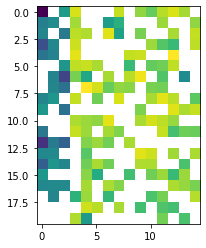

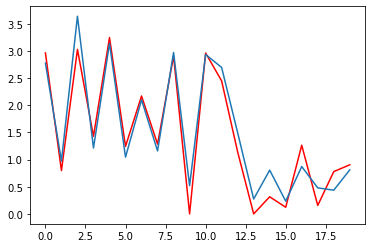

In [38]:
p = 20 ### pocet mereni
n = 15 # pocet regresnich koeficientu

if 0:
    # matice regresnich koeficientu
    X = np.random.randn(p,n)
    ind = X < 0
    X[ind] = 0
    # tento vektor budeme odhadovat
    beta_true = np.array([0,0,0,1,0,0,1,1,1,0,0,0,0,0,0])

    # chceme spatnou podminenost
    ind = [0,1,2]
    X[:,ind] = X[:,ind]/100
    
    # chceme sum
    y = np.transpose(X@beta_true + 0.3*np.random.randn(p)) ### sila sumu je volitelna
    y.shape = (p,1)
    ind2 = y<0
    y[ind2] = 0
    #print(y)
else:
    # data pouzita v prednasce
    X = sio.loadmat("lin_reg_data.mat")["X"]
    y = sio.loadmat("lin_reg_data.mat")["y"]
    beta_true = sio.loadmat("lin_reg_data.mat")["beta_true"]
    #print(y)

plt.imshow(np.log(X),interpolation='none')

#---------------------------------------------
# vykreslete do jednoho grafu mereni a generovana data
#---------------------------------------------
plt.figure()
plt.plot(X@beta_true,color='red')
plt.plot(y)

# Wishart prior

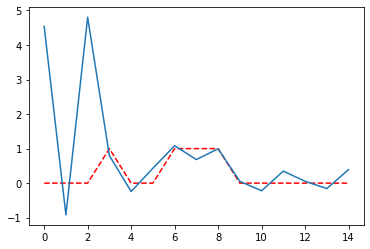

In [93]:
hat_v = np.ones((n,n))
hat_omega = 1/np.ndarray.max(X)
hist_omega = []
c0 = 1e-10
d0 = 1e-10
a0 = 1e-2
b0 = 1e-10

for i in range(1,100):
    si_beta = np.linalg.inv(hat_omega*X.T@X + hat_v)
    mu_beta = si_beta@(hat_omega*X.T@y)
    hat_beta = mu_beta
    hat_bbt = mu_beta@mu_beta.T + si_beta
    
    si_v = np.linalg.inv(hat_bbt + ((a0)**(-1))*np.eye(n))
    b_v = b0 + np.ones((n,n))
    hat_v = b_v*si_v
    #hat_v = b_v@si_v
    
    c = c0 + p/2
    d = d0 + 1/2*(y.T@y) - y.T@X@hat_beta + 1/2*np.trace(hat_bbt@X.T@X)
    hat_omega = c/d
    hist_omega = np.append(hist_omega,hat_omega)
    
    

plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(hat_beta)


# Wishart prior s lokalizací

In [98]:
def get_loc_matrix(n, t):
    loc = np.diag(np.full(n,t))
    for i in range(1, 4):
        loc += np.diagflat([t]*(n-i), -i)
        loc += np.diagflat([t]*(n-i), i)
    return loc
    
loc = get_loc_matrix(n, 1)
loc

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

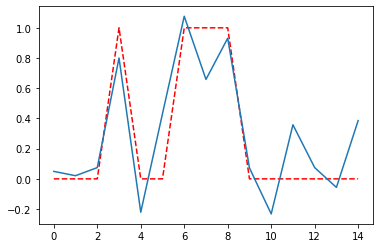

In [114]:
hat_v = np.ones((n,n))
hat_omega = 1/np.ndarray.max(X)
hist_omega = []
c0 = 1e-10
d0 = 1e-10
a0 = 1e-2
b0 = 1e-10
loc = get_loc_matrix(n, 40)

for i in range(1,100):
    si_beta = np.linalg.inv(hat_omega*X.T@X + hat_v*loc)
    mu_beta = si_beta@(hat_omega*X.T@y)
    hat_beta = mu_beta
    hat_bbt = mu_beta@mu_beta.T + si_beta
    
    si_v = np.linalg.inv(hat_bbt + ((a0)**(-1))*np.eye(n))
    b_v = b0 + np.ones((n,n))
    hat_v = b_v*si_v
    
    c = c0 + p/2
    d = d0 + 1/2*(y.T@y) - y.T@X@hat_beta + 1/2*np.trace(hat_bbt@X.T@X)
    hat_omega = c/d
    hist_omega = np.append(hist_omega,hat_omega)
    
    
    
plt.figure()
plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(hat_beta)